# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
#from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# + latitude = northen hem/ - latitude = southern hem
# + longitude = east of prime merid / - longitude = west of prime merid

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
# one list of longitudes, one list of latitudes
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

# zip the lists of lats and longs into tuple
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 562


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# weather api key 
api_key = "5166ccbd2fe018875a15c56271269f50"
# geoapify key
geoapify_key = "1d7d4d1297c845b29fc466f8d4fc90c4"

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

"""
city = 
queryURL += city


weatherJSON = weather.json() # same as requests.get(queryURL).json()
weatherJSON 
# [coord]['lat']
# [coord]['lon']
# ['main']['temp']

# identify cities for each of the generated values
# build a DF that stores the following


#reset so the url doesnt hold any other city
queryURL = f"{url}appid={apikey}&units={units}&q="

weather = requests.get(queryURL)
temperatures = []
lats = []
lons = []
cities = []
"""
import time
count = 0

"""
while count <5:
    time.sleep(1)
    count +=1
    if count == 1:
        print(f"Printed after {count} second")
    else:
        print(f"Printed after {count} seconds")
"""

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    #call to requests and jsonify the response
    response = requests.get(city_url).json()
    """
    # extract the temperature and add to the temperatures list
    temperatures.append(response['main']['temp'])
    # extract lat and lon
    lats.append(response['coord']['lat'])
    lons.append(response['coord']['lon'])
    # extract the city name from Open Weather
    cities.append(response['name'])
    """
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #pause for 1 second - avoids the API key for OpenWeather from being disabled
        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | kabale
Processing Record 3 of Set 1 | cova figueira
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | flying fish cove
Processing Record 8 of Set 1 | alofi
Processing Record 9 of Set 1 | al artawiyah
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | liberty
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | fort mcmurray
Processing Record 15 of Set 1 | boueni
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | egilsstadir
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | kapuskasing
Processing Record 21 of Set 1 | bethel
Processing Record 22 of

Processing Record 40 of Set 4 | san antonio del estrecho
City not found. Skipping...
Processing Record 41 of Set 4 | santo domingo de los colorados
Processing Record 42 of Set 4 | teknaf
Processing Record 43 of Set 4 | fort bragg
Processing Record 44 of Set 4 | klyuchi
Processing Record 45 of Set 4 | severo-yeniseyskiy
Processing Record 46 of Set 4 | margate
Processing Record 47 of Set 4 | kalianget
Processing Record 48 of Set 4 | duragan
Processing Record 49 of Set 4 | ust-nera
Processing Record 0 of Set 5 | tashtyp
Processing Record 1 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 5 | bourg-saint-maurice
Processing Record 3 of Set 5 | uusikaupunki
Processing Record 4 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 5 of Set 5 | calca
Processing Record 6 of Set 5 | tolanaro
Processing Record 7 of Set 5 | kangding
Processing Record 8 of Set 5 | pisco
Processing Record 9 of Set 5 | castillos
Processing Record 10 of Set 5 | bouar
Pro

Processing Record 25 of Set 8 | miyaly
Processing Record 26 of Set 8 | east london
Processing Record 27 of Set 8 | monrovia
Processing Record 28 of Set 8 | neelankarai
Processing Record 29 of Set 8 | udayagiri
Processing Record 30 of Set 8 | horice
Processing Record 31 of Set 8 | marudi
City not found. Skipping...
Processing Record 32 of Set 8 | harstad
Processing Record 33 of Set 8 | afaahiti
Processing Record 34 of Set 8 | ancud
Processing Record 35 of Set 8 | pak phanang
Processing Record 36 of Set 8 | multai
Processing Record 37 of Set 8 | ad dilam
Processing Record 38 of Set 8 | sandur
Processing Record 39 of Set 8 | natal
Processing Record 40 of Set 8 | villa huidobro
Processing Record 41 of Set 8 | ruthen
Processing Record 42 of Set 8 | mccomb
Processing Record 43 of Set 8 | korla
Processing Record 44 of Set 8 | beyneu
Processing Record 45 of Set 8 | inhambane
Processing Record 46 of Set 8 | nakonde
Processing Record 47 of Set 8 | angaur state
Processing Record 48 of Set 8 | sal

In [8]:
# Convert the cities weather data into a Pandas DataFrame
# build the dataframe    
cityDataDF = pd.DataFrame(city_data)
# Show Record Count
cityDataDF.count()

City          532
Lat           532
Lng           532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Country       532
Date          532
dtype: int64

In [9]:
# Display sample data
cityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-17.82,99,100,9.40,RU,1701643034
1,kabale,-1.2486,29.9899,57.43,92,80,2.89,UG,1701643035
2,cova figueira,14.8905,-24.2934,72.61,79,56,14.67,CV,1701643036
3,avarua,-21.2078,-159.7750,78.85,73,75,16.11,CK,1701643038
4,invercargill,-46.4000,168.3500,52.68,51,78,9.64,NZ,1701643039


In [13]:
# Export the City_Data into a csv
cityDataDF.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
cityDataDF = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
cityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-17.82,99,100,9.40,RU,1701643034
1,kabale,-1.2486,29.9899,57.43,92,80,2.89,UG,1701643035
2,cova figueira,14.8905,-24.2934,72.61,79,56,14.67,CV,1701643036
3,avarua,-21.2078,-159.7750,78.85,73,75,16.11,CK,1701643038
4,invercargill,-46.4000,168.3500,52.68,51,78,9.64,NZ,1701643039


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

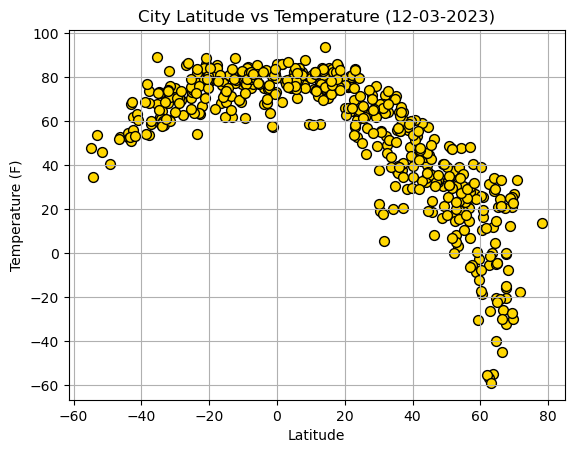

In [23]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(
    cityDataDF['Lat'],
    cityDataDF['Max Temp'],
    color='gold',
    edgecolor='black',
    linewidths=1,
    marker='o',
    label='Cities',
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

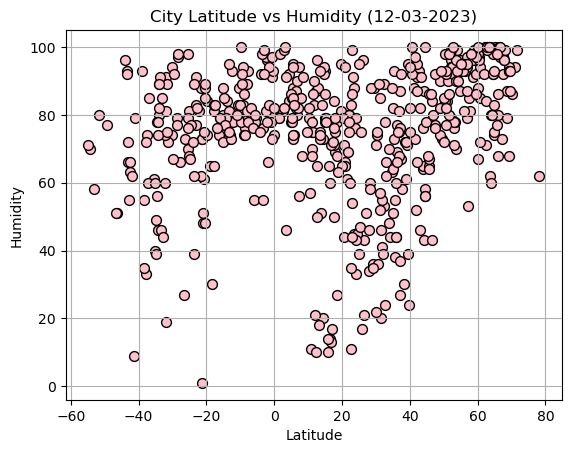

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    cityDataDF['Lat'],
    cityDataDF['Humidity'],
    color='pink',
    edgecolor='black',
    linewidths=1,
    marker='o',
    label='Cities',
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

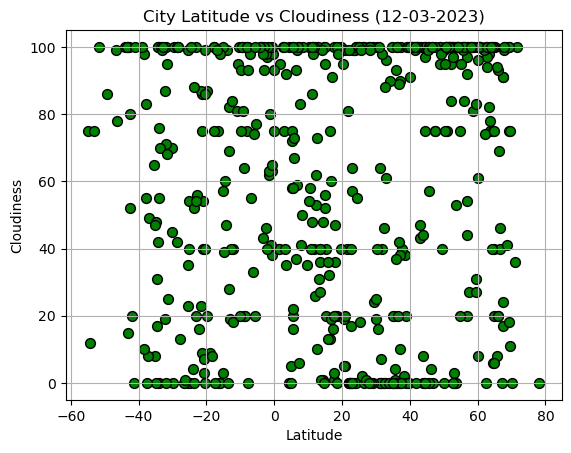

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    cityDataDF['Lat'],
    cityDataDF['Cloudiness'],
    color='green',
    edgecolor='black',
    linewidths=1,
    marker='o',
    label='Cities',
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

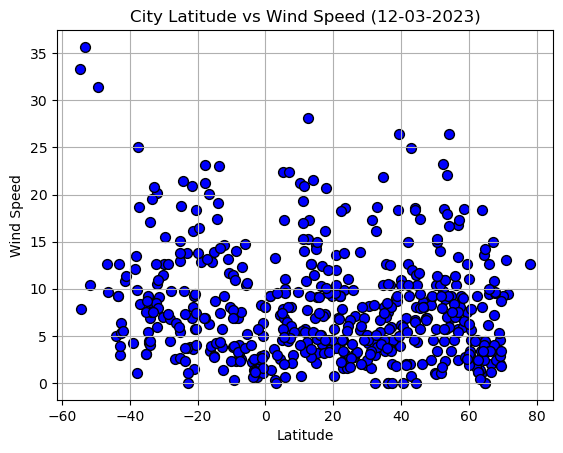

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    cityDataDF['Lat'],
    cityDataDF['Wind Speed'],
    color='blue',
    edgecolor='black',
    linewidths=1,
    marker='o',
    label='Cities',
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates,color):
    
    # compute linear regresssion
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # plot
    plt.scatter(x_values,y_values,color=color, edgecolor="black", s=50)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [72]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = cityDataDF.loc[(cityDataDF["Lat"]>=0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-17.82,99,100,9.40,RU,1701643034
2,cova figueira,14.8905,-24.2934,72.61,79,56,14.67,CV,1701643036
5,longyearbyen,78.2186,15.6401,13.84,62,0,12.66,SJ,1701643040
8,al artawiyah,26.5053,45.3444,63.34,43,100,7.09,SA,1701643044
9,cabo san lucas,22.8909,-109.9124,83.50,54,0,4.61,MX,1701643045


In [73]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = cityDataDF.loc[(cityDataDF["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kabale,-1.2486,29.9899,57.43,92,80,2.89,UG,1701643035
3,avarua,-21.2078,-159.7750,78.85,73,75,16.11,CK,1701643038
4,invercargill,-46.4000,168.3500,52.68,51,78,9.64,NZ,1701643039
6,flying fish cove,-10.4217,105.6791,76.68,88,100,8.05,CX,1701643041
7,alofi,-19.0595,-169.9187,84.09,65,9,12.86,NU,1701643043


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.747118088799239


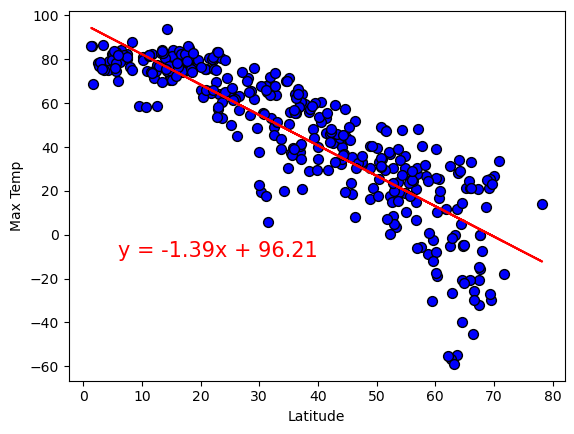

In [74]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10), "blue")

# there is a strong correlation between temperature and latitude.

The r-squared is: 0.40613799961627217


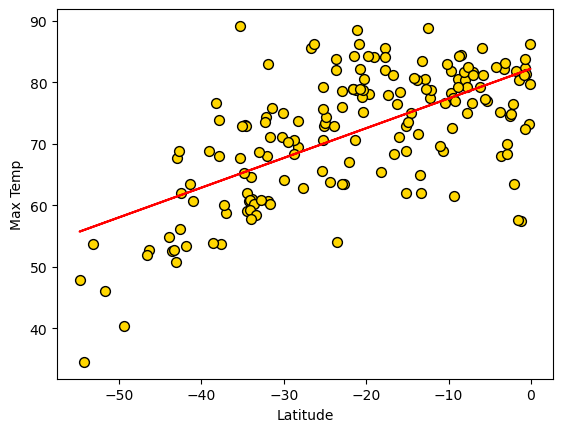

In [75]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10), "gold")

# There is a weak correlation between temperature and latitude.

**Discussion about the linear relationship:** 

In the Northern Hemisphere there is a strong correlation between temperature and latitude.

In the Southern Hemisphere there is a weak correlation between temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.11174368114164557


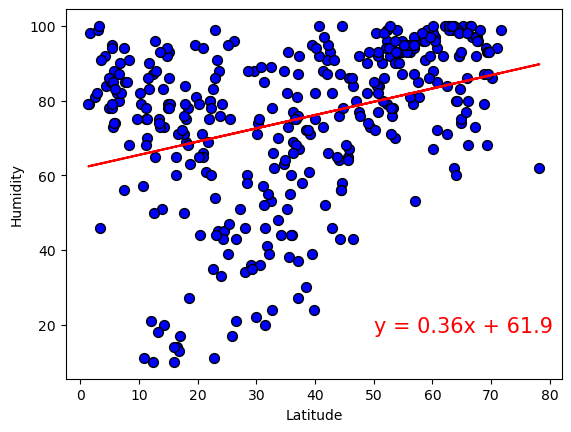

In [76]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50,18), "blue")

# none or very weak

The r-squared is: 0.11996024743130858


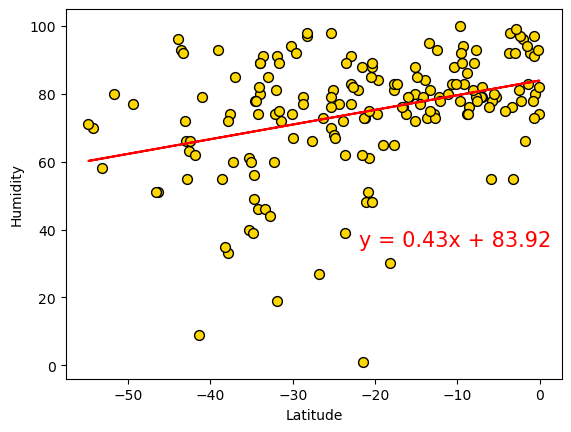

In [77]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-22,35), "gold")

# none or very weak

**Discussion about the linear relationship:** 

There is a weak correlation between humidity and latitude in both the Northern and Souther Hempispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.027115825518037467


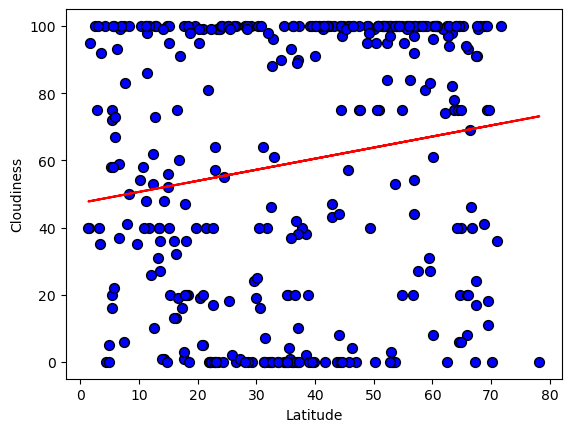

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-50,20), "blue")

The r-squared is: 0.0093212334412721


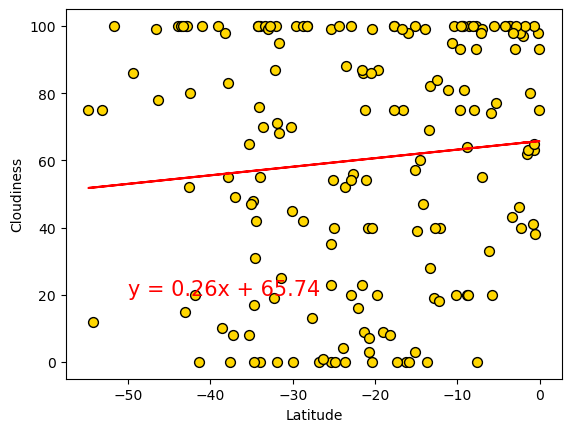

In [79]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-50,20), "gold")

**Discussion about the linear relationship:** 


There is almost no correlation of Cloudiness to Latitude in both hemispheres

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.003730685673279339


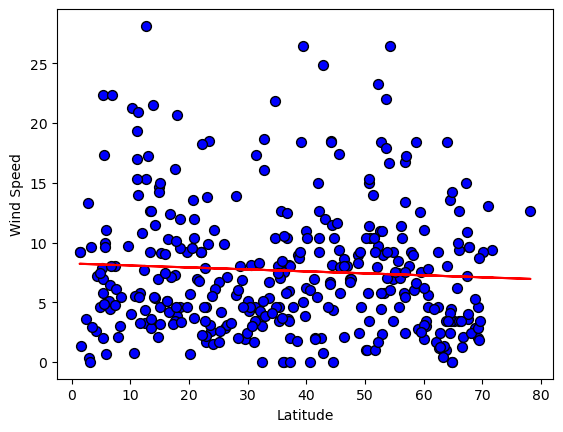

In [80]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (50,50), "blue")

The r-squared is: 0.12722392586618028


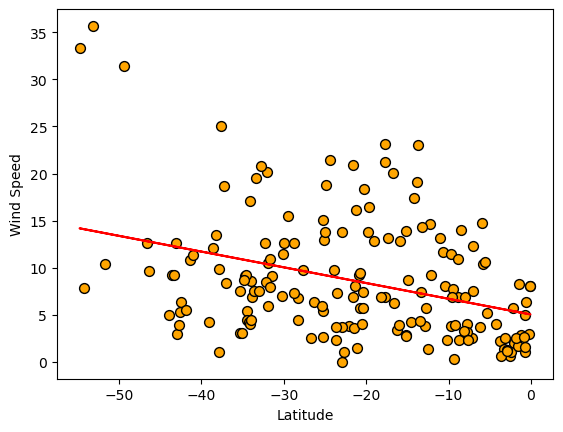

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (50,50), "orange")

**Discussion about the linear relationship:** 


There is a weak to almost no correlation of wind speed to Latitude in both hemispheres.